# Network Notes

In [131]:
network_model = "tale-prog-stateful8f"
iter1 = 5
iter2 =185
from subprocess import check_output, call

import os
os.chdir("/home/ec2-user/store/c2gen/notebooks")


cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])
cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
res = check_output(["tail", "-n 12", "/home/ec2-user/store/c2gen/out/"+network_model+"/log"])
res = str(res).replace('\\n', "\n")
print(res)
res = check_output(["tail", '-n 1', "/home/ec2-user/store/c2gen/nohup-"+network_model+".out"])
res = str(res).replace('\\n', "\n")
res = str(res).replace('\\r', "\n")
res = str(res).replace('\\x08', "")
res = res.split("\n")[-1]
print(res)

b'Training Iteration 184 
Training Iteration 185 
Generating samples 
saving generated sample output to:  out/tale-prog-stateful8f/out-c2cb-185 
generating sample data of length:  400 
seed sequence for generation starts at frame index:  0  (approx.  0 : 0 ) 
wrote frames:  400 
Training Iteration 186 
Training Iteration 187 
Training Iteration 188 
Training Iteration 189 
Training Iteration 190 
'
"


In [132]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

The network _tale-prog-large3_ is a three layer LSTM with a final dense layer of ReLU cells.

The network was set to learn as follows:

Iterations   1 -  59: LSTM 1 & Dense trainable

Iterations  60 - 239: LSTM 1, LSTM 2 & Dense trainable

Iterations 240 - 600: LSTM 3 & Dense trainable

Optimizer: Nadam (Nesterov Adam), with default parameters (lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)

Batches per iteration (single epoch per iteration): 72880 batches of 200 Codec2 frames (equivalent to 5 seconds of audio).




In [133]:
nd.model_config(network_model)

lstm_1 : LSTM
320 units
tanh activation
0.0 dropout

lstm_2 : LSTM
320 units
tanh activation
0.0 dropout

lstm_3 : LSTM
320 units
tanh activation
0.0 dropout

dense_1 : Dense
16 units
relu activation
 dropout



Early Iterations
===

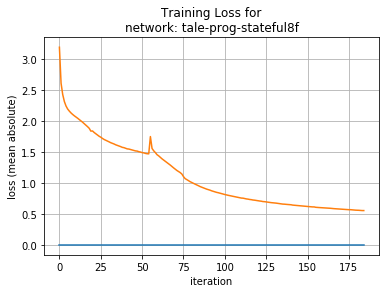

In [134]:
nd.plot_training_loss(network_model)

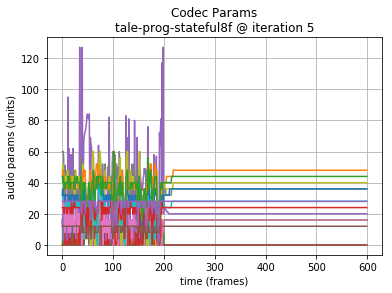

In [135]:
nd.plot_codec_params(network_model,iter1)

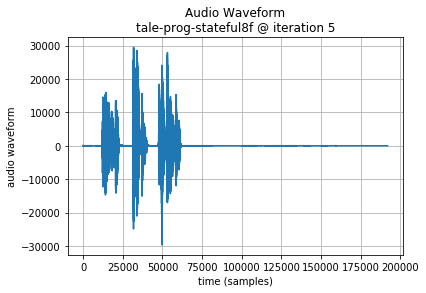

In [136]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [137]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+".wav"))

Later Iterations
===

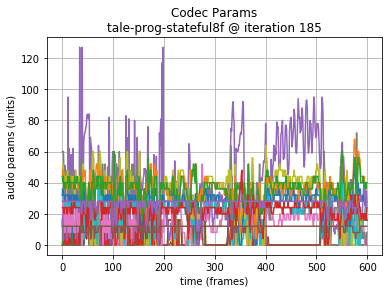

In [138]:
nd.plot_codec_params(network_model,iter2)

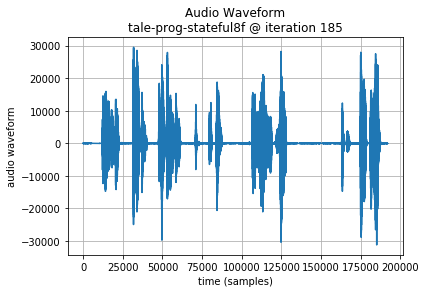

In [139]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [140]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+".wav"))

Generate from another sample
--
Change first line of the next cell to `gen=True`

Set `outname` to be the base filename for the output file (stored to the *.generated* directory)

Set `c2file` to be the filename of the Codec2 encoded file containing the seed

Set `seed_start_index` to be one of: `"random"`, the frame number, or more conveniently the number of seconds into the audio (for example `"27s"`)

The generator takes several minutes to complete. It will not run if the `outname`_.wav_ file already exists.

The first 5 seconds of audio are the original seed data. The remaining audio is generated from the network model specified.

In [141]:
gen=True
modelfn="out/tale-prog-large3/model-420.h5" 
outname="testout40w2"
c2file="test/TaleOfTwoCities_pt09.c2cb"
seed_start_index = "600s"



if gen:  
  os.chdir("/home/ec2-user/store/c2gen")
  if os.path.isfile('generated/'+outname+'.wav'):
    print("File", outname, "already exists")
  else:  
    print("Starting generator - this could take some time")
    call(["python", "lstm_c2_generation.py", "--generate="+outname, "--seed_index="+seed_start_index, c2file, modelfn])
    print("Generator complete")  
  display(Audio(filename="/home/ec2-user/store/c2gen/generated/"+outname+".wav"))  
  os.chdir("/home/ec2-user/store/c2gen/notebooks")

File testout40w2 already exists
